# Notebook SAE 202

## Partie I


Chargement du fichier audio et import des librairies pour la suite du Notebook 

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sc
import soundfile as sf

file ="NR4.wav"

data, samplerate = sf.read(file)


Affichage de la tranche du signal et ça FFT

C:\Users\Clement\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


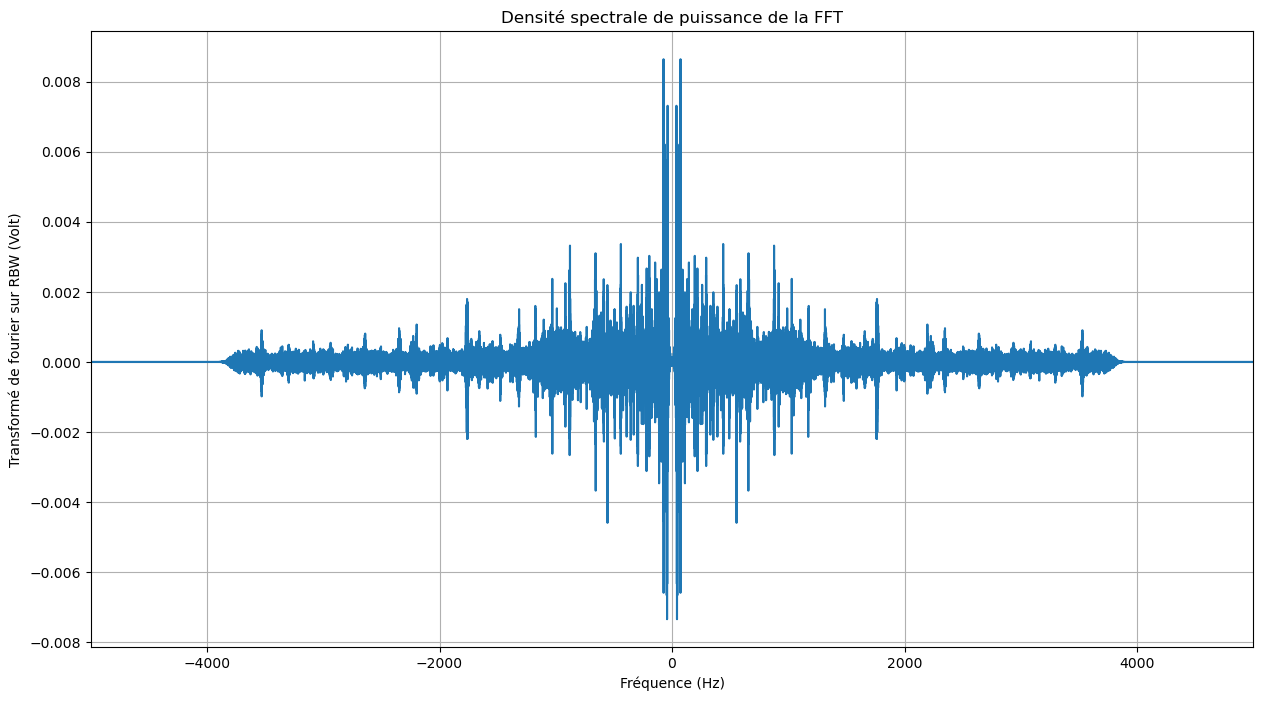

In [124]:
tranche = data[int(1*samplerate):int(30*samplerate)]

N = len(tranche)
tfft = N*samplerate

# FFT Billatérale
fft = (1/N)*(np.fft.fft(tranche))

# Calcul de la FFT Monolatérale
fft_mono = np.concatenate((fft[0:1], 2*fft[1:int(N/2)]))
# On calcul la valeur absolue de fft_mono pour obtenir la fft monolatérale
fft_mono_abs = np.abs(fft_mono)


# Calcul de la Densité spectrale en Volt efficace sur RBW
fft_mono_eff = fft_mono_abs/np.sqrt(2)

# Calcul de la Densité spectrale en dBm sur RBW
fft_mono_dbm = 10*np.log10(np.square(fft_mono_eff)/50*1000)

# Calcul de la plage de fréquence pour la FFT
#f_tranche = np.arange(0, samplerate/2, samplerate/N)


f_tranche = np.fft.fftfreq(N, 1/samplerate)



# Affichage de la FFT
plt.figure(figsize=(15, 8))
plt.plot(f_tranche, fft)
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Transformé de fourier sur RBW (Volt)')
plt.title('Densité spectrale de puissance de la FFT')
# affichage entre 0 et 1K Hz
plt.xlim(-5000, 5000)
plt.grid()
plt.show()



Calcul de la largeur de bande du signal

In [102]:
#on récupère les fréquences




# Calcul de la bande de fréquences
bandwidth = 4000 
print(bandwidth)


4000


Fréquence d'échantillonnage, nombre de bit de codage et le nombre de niveau de quantification.

In [159]:
print(f"La fréquence d'échantillonnage est : {samplerate} Hz")

# Résolution 

bit_depth = data.dtype.itemsize *2

print(bit_depth) 


La fréquence d'échantillonnage est : 100000 Hz
8


### Transformé de Fourier du signal modulé AM

Soit $f(t)$ la fonction sinusoïdale caractérisant notre signal audio,
on prend $a(t)$ la sinusoïde modulante,
et $p(t)$ le signal en sortie.
On obtient l'équation suivante :
$$ p(t) = s(t).A.cos(2 \pi f_{0} t)$$
avec $A$ l'amplitude du signal modulant, la fréquence de la porteuse, $f_{0}$ la fréquence du signal modulant et s(t) le signal. 

On effectue donc maintenant la Transformé de Fourier de 
$$p(t)\xrightarrow{TF} P(f)$$
On donne donc la nouvelle expression de $P(f)$ défini par : (a verif)
$$P(f) = S(f)*\frac{A}{2} [\delta (f-f_0)+ \delta (f+f_0)]$$
$$P(f) =  \frac{A}{2} [S(f-f_0) + S(f+f_0)]$$

On parle donc de translation de fréquence du aux différentes fonction dirac qui permettent une translation.
Dans notre cas c'est bien la fréquence qui est translaté.






### Création du signal  modulant

In [104]:
## Création de la sinusoide modulant
start = 0
stop = 120
tfft = stop - start
te = 1/samplerate
f0 = 10e3
#nb_echantillons = int(stop * samplerate)
time = np.arange(0, len(tranche)/samplerate, te)

AM_modulant = np.sin(2*np.pi*f0*time)

amplitude_modulant = (np.max(AM_modulant)+np.abs(np.min(AM_modulant)))/2
amplitude_signal = (np.max(tranche) + np.abs(np.min(tranche)))/2

print(amplitude_modulant)
print(amplitude_signal)
print(np.shape(amplitude_modulant))
print(np.shape(amplitude_signal))
print(np.shape(tranche))
print(np.shape(AM_modulant))


modulated_signal = AM_modulant*tranche



0.9510565164016
0.8018951416015625
()
()
(2900000,)
(2900000,)


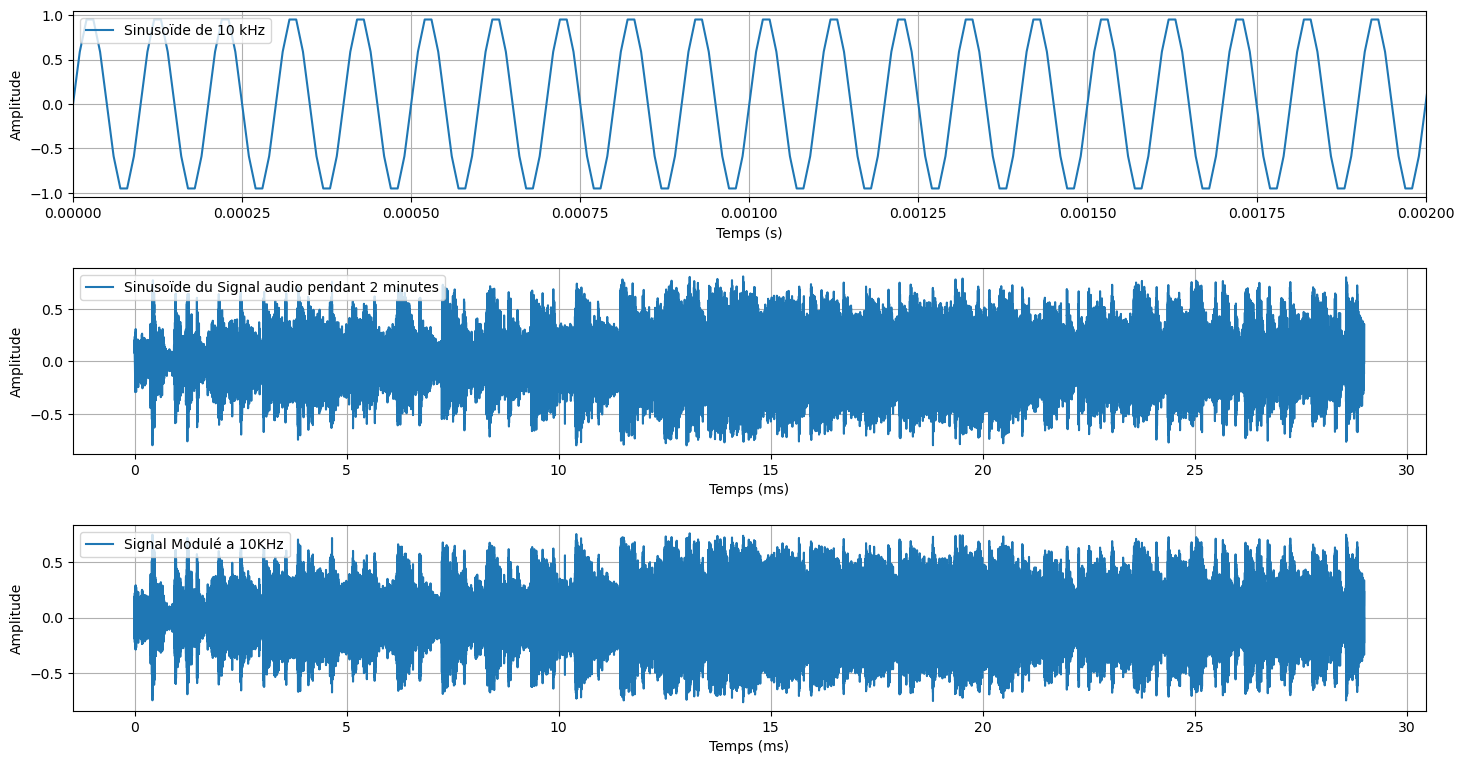

In [105]:

fig, ax = plt.subplots(3, 1, figsize=(15, 8))


ax[0].plot(time, AM_modulant, label="Sinusoïde de 10 kHz")
ax[0].legend(loc="upper left")
ax[0].set_xlabel('Temps (s)')
ax[0].set_ylabel('Amplitude')
ax[0].set_xlim(0, 2e-3)
ax[0].grid(True)

#debut=0
#fin=samplerate*5

#tranche = data[int(0):int(fin)]


ax[1].plot(time, tranche, label="Sinusoïde du Signal audio pendant 2 minutes")
ax[1].legend(loc="upper left")
ax[1].set_xlabel('Temps (ms)')
ax[1].set_ylabel('Amplitude')
ax[1].grid(True)


ax[2].plot(time, modulated_signal , label="Signal Modulé a 10KHz")
ax[2].legend(loc="upper left")
ax[2].set_xlabel("Temps (ms)")
ax[2].set_ylabel("Amplitude")
ax[2].grid(True)

fig.tight_layout(pad=2.0)
plt.show()

FFT Bilateral audio

In [106]:
N = len(tranche)
tfft = N*samplerate

# FFT Billatérale
fft = (1/N)*(np.fft.fft(tranche))


# Calcul de la FFT Monolatérale
#fft_mono = np.concatenate((fft[0:1], 2*fft[1:int(N/2)]))
# On calcul la valeur absolue de fft_mono pour obtenir la fft monolatérale
#fft_mono_abs = np.abs(fft_mono)


# Calcul de la Densité spectrale en Volt efficace sur RBW
fft_eff = fft/np.sqrt(2)

# Calcul de la Densité spectrale en dBm sur RBW
fft_dbm = 10*np.log10(np.square(fft_eff)/50*1000)

# Calcul de la plage de fréquence pour la FFT
f_tranche = np.fft.fftfreq(N, 1/samplerate)


FFT du signal Modulé :



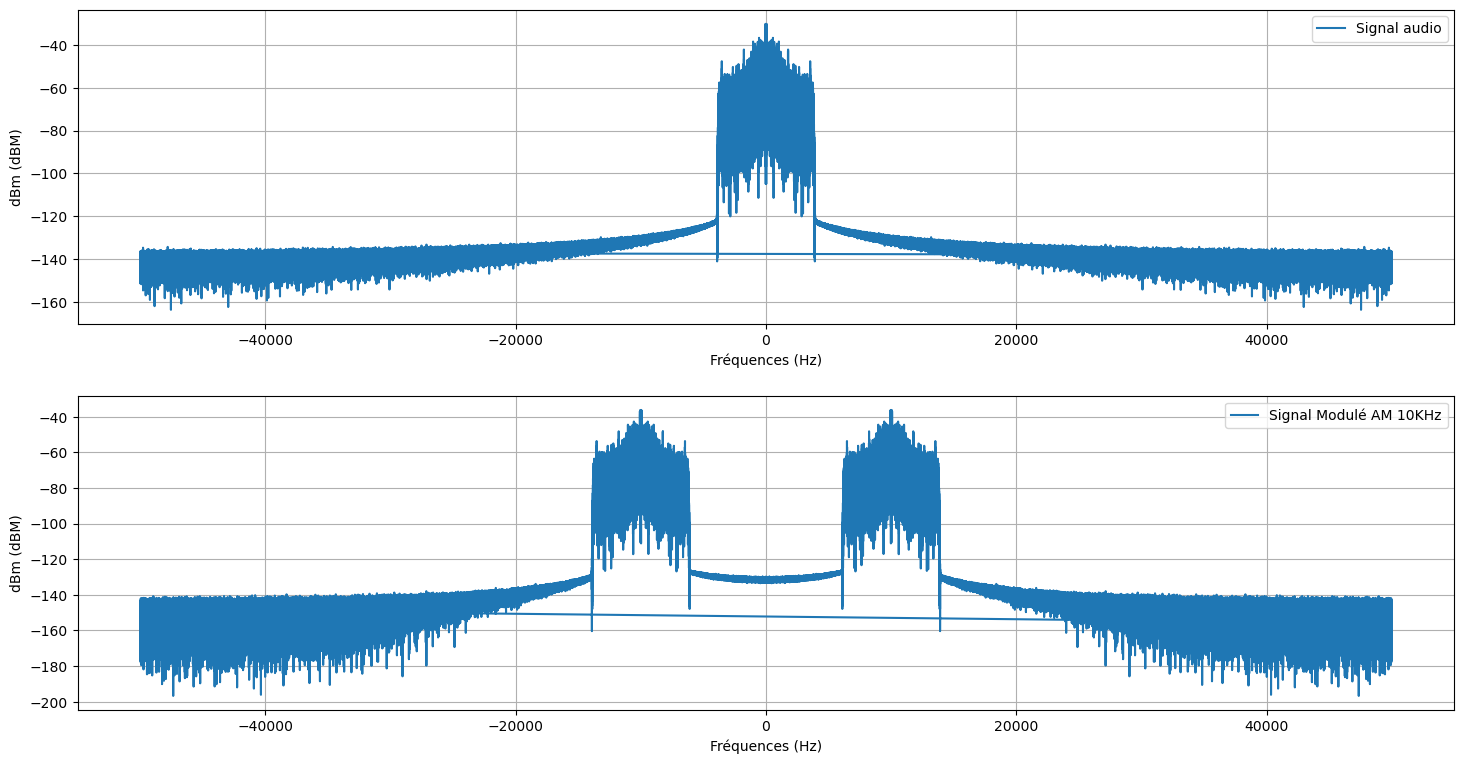

In [107]:
N = len(modulated_signal)
tfft_modul = N*samplerate

# FFT Billatérale
fft_modul = (1/N)*(np.fft.fft(modulated_signal))

# Calcul de la FFT Monolatérale
#fft_mono_modul = np.concatenate((fft_modul[0:1], 2*fft_modul[1:int(N/2)]))
# On calcul la valeur absolue de fft_mono pour obtenir la fft monolatérale
#fft_mono_abs_modul = np.abs(fft_mono_modul)


# Calcul de la Densité spectrale en Volt efficace sur RBW
fft_eff_modul = fft_modul/np.sqrt(2)

# Calcul de la Densité spectrale en dBm sur RBW
fft_dbm_modul = 10*np.log10(np.square(fft_eff_modul)/50*1000)

# Calcul de la plage de fréquence pour la FFT
f_modulated_signal = np.fft.fftfreq(N, 1/samplerate)

fig, ax = plt.subplots(2, 1, figsize=(15, 8))

ax[0].plot(f_tranche, fft_dbm, label="Signal audio")
#ax[0].semilogx(f_tranche, fft_mono_dbm, linewidth = 2)
ax[0].set_xlabel("Fréquences (Hz)")
ax[0].set_ylabel("dBm (dBM)")
ax[0].legend(loc="upper right")
ax[0].grid(True)

ax[1].plot(f_modulated_signal, fft_dbm_modul, label="Signal Modulé AM 10KHz")
ax[1].set_xlabel("Fréquences (Hz)")
ax[1].set_ylabel("dBm (dBM)")
ax[1].legend(loc="upper right")
ax[1].grid(True)


fig.tight_layout(pad=2.0)
plt.show()

## Démodulation 


### Equation de la démodulation :
Si on a :
$$ p(t) = [A_a + A_f cos(2  \pi f_{0_{a}} t + \varphi)]cos(2 \pi f_{0_{f}} t + \varphi)$$
avec $A_a$ l'amplitude du signal modulant et $A_f$ l'amplitude du signal audio, $ f_{0_{f}} $ la fréquence de la porteuse, $f_{0_{a}}$ la fréquence du signal modulant et $\varphi$ la phase du signal modulé.

On obtient donc pour l'équation de la démodulation :

$$ k(t) = p(t).cos(2 \pi f_{0_{a}} t + \varphi)$$

D'ou la transformé de Fourier suivante :
$$k(t)\xrightarrow{TF} K(f)$$

$$K(f) = \frac{A_a}{2}\left[\delta(f - f_{0_f}) + \delta(f + f_{0_f})\right] + \frac{A_f}{4}\left[\delta(f - (f_{0_a} + f_{0_f})) + \delta(f + (f_{0_a} + f_{0_f}))\right] + \frac{A_f}{4}\left[\delta(f - (f_{0_a} - f_{0_f})) + \delta(f + (f_{0_a} - f_{0_f}))\right]$$



# Reception AM

In [108]:
# Translation inverse du signal :
demodolated_signal = modulated_signal*AM_modulant





N = len(demodolated_signal)
tfft_demodul = N*samplerate

fft_demodul = (1/N)*(np.fft.fft(demodolated_signal))

# Calcul de la FFT Monolatérale
#fft_mono_modul = np.concatenate((fft_modul[0:1], 2*fft_modul[1:int(N/2)]))
# On calcul la valeur absolue de fft_mono pour obtenir la fft monolatérale
#fft_mono_abs_modul = np.abs(fft_mono_modul)


# Calcul de la Densité spectrale en Volt efficace sur RBW
fft_eff_demodul = fft_demodul/np.sqrt(2)

# Calcul de la Densité spectrale en dBm sur RBW
fft_dbm_demodul = 10*np.log10(np.square(fft_eff_demodul)/50*1000)

# Calcul de la plage de fréquence pour la FFT
f_demodolated_signal = np.fft.fftfreq(N, 1/samplerate)


# Calcul de la plage de fréquence pour la FFT


Création du filtre


In [152]:
# Translation inverse du signal :
demodolated_signal = modulated_signal*AM_modulant

# Création du filtre
nyquist = samplerate /2
fc = 4000
fcn = fc/nyquist
order = 8
b, a = sc.butter(order, fcn, btype="low")





C:\Users\Clement\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


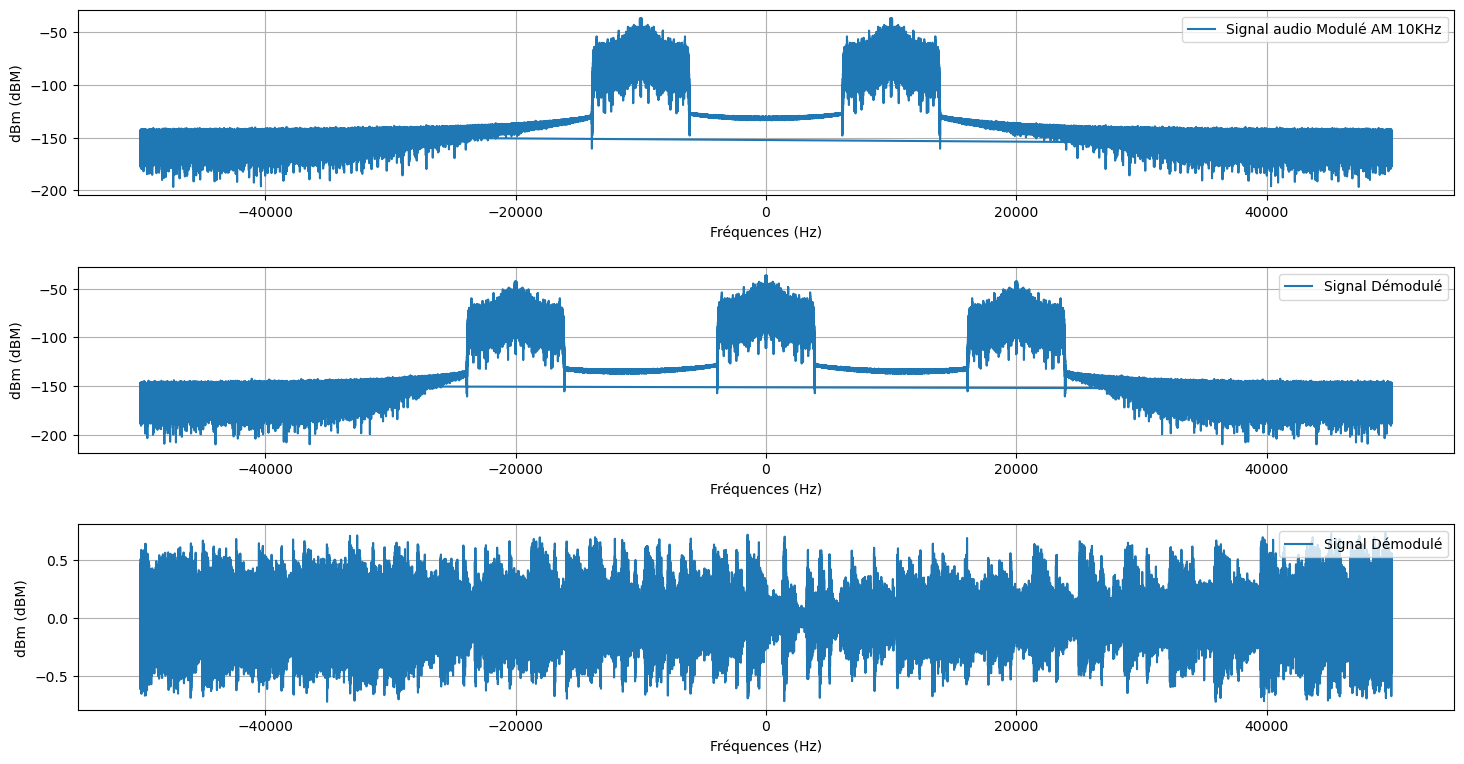

In [138]:


fig, ax = plt.subplots(3, 1, figsize=(15, 8))

ax[0].plot(f_modulated_signal, fft_dbm_modul, label="Signal audio Modulé AM 10KHz")
#ax[0].semilogx(f_tranche, fft_mono_dbm, linewidth = 2)
ax[0].set_xlabel("Fréquences (Hz)")
ax[0].set_ylabel("dBm (dBM)")
ax[0].legend(loc="upper right")
ax[0].grid(True)

ax[1].plot(f_demodolated_signal, fft_dbm_demodul, label="Signal Démodulé")
ax[1].set_xlabel("Fréquences (Hz)")
ax[1].set_ylabel("dBm (dBM)")
ax[1].legend(loc="upper right")
ax[1].grid(True)

ax[2].plot(f_demodolated_signal, demodolated_signal, label="Signal Démodulé")
ax[2].set_xlabel("Fréquences (Hz)")
ax[2].set_ylabel("dBm (dBM)")
ax[2].legend(loc="upper right")
ax[2].grid(True)

fig.tight_layout(pad=2.0)
plt.show()

On applique le filtre passe-bas sur le signal démodulé pour avoir le signal de base  

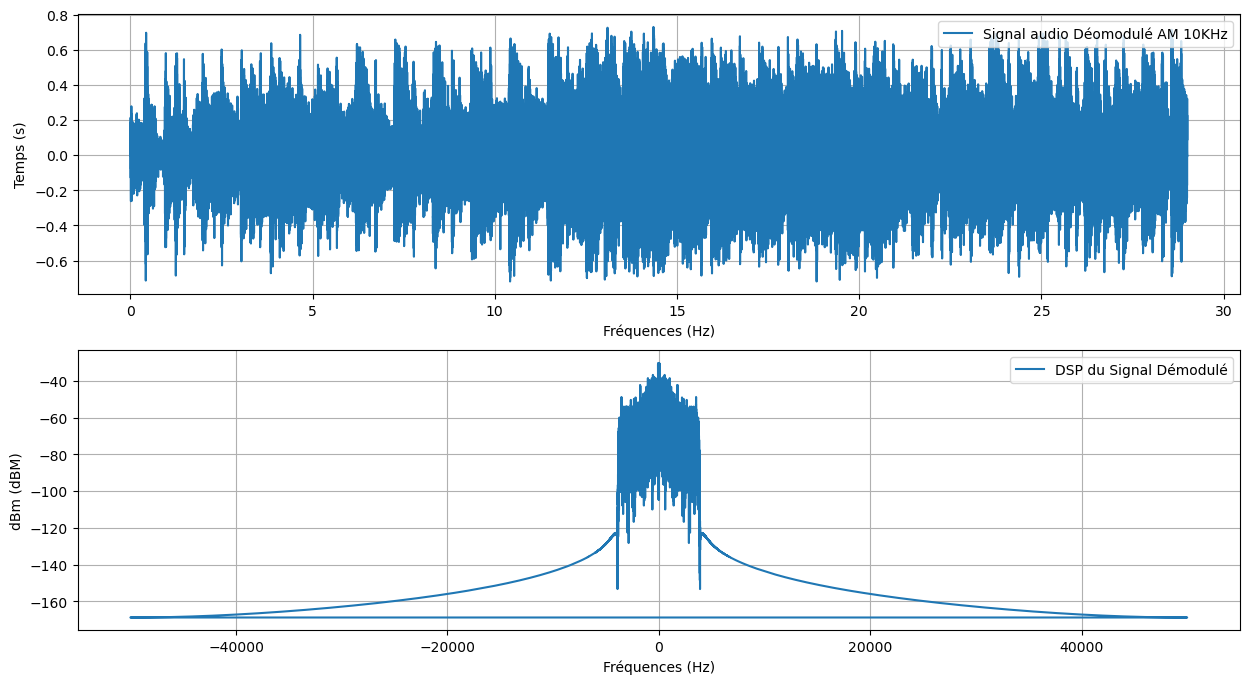

In [157]:
filtered_audio = 2*sc.filtfilt(b, a, demodolated_signal)

N = len(filtered_audio)
tfft_demodul = N*samplerate

fft_demodul = (1/N)*(np.fft.fft(filtered_audio))

# Calcul de la FFT Monolatérale
#fft_mono_modul = np.concatenate((fft_modul[0:1], 2*fft_modul[1:int(N/2)]))
# On calcul la valeur absolue de fft_mono pour obtenir la fft monolatérale
#fft_mono_abs_modul = np.abs(fft_mono_modul)


# Calcul de la Densité spectrale en Volt efficace sur RBW
fft_eff_demodul = fft_demodul/np.sqrt(2)

# Calcul de la Densité spectrale en dBm sur RBW
fft_dbm_demodul = 10*np.log10(np.square(fft_eff_demodul)/50*1000)

# Calcul de la plage de fréquence pour la FFT
f_demodolated_signal = np.fft.fftfreq(N, 1/samplerate)

fig, ax = plt.subplots(2, 1, figsize=(15, 8))

ax[0].plot(time, demodolated_signal, label="Signal audio Déomodulé AM 10KHz")
#ax[0].semilogx(f_tranche, fft_mono_dbm, linewidth = 2)
ax[0].set_xlabel("Fréquences (Hz)")
ax[0].set_ylabel("Temps (s)")
ax[0].legend(loc="upper right")
ax[0].grid(True)

ax[1].plot(f_demodolated_signal, fft_dbm_demodul, label="DSP du Signal Démodulé")
ax[1].set_xlabel("Fréquences (Hz)")
ax[1].set_ylabel("dBm (dBM)")
ax[1].legend(loc="upper right")
ax[1].grid(True)